In [41]:
%pip install matplotlib tensorflow gradio

   ---------------------------------------- 0.0/57.2 MB ? eta -:--:--
    --------------------------------------- 1.0/57.2 MB 5.6 MB/s eta 0:00:10
   - -------------------------------------- 1.6/57.2 MB 3.5 MB/s eta 0:00:16
   - -------------------------------------- 2.4/57.2 MB 3.7 MB/s eta 0:00:15
   - -------------------------------------- 2.6/57.2 MB 3.8 MB/s eta 0:00:15
   -- ------------------------------------- 3.7/57.2 MB 3.4 MB/s eta 0:00:16
   -- ------------------------------------- 3.9/57.2 MB 3.5 MB/s eta 0:00:16
   --- ------------------------------------ 5.2/57.2 MB 3.5 MB/s eta 0:00:15
   ---- ----------------------------------- 6.0/57.2 MB 3.5 MB/s eta 0:00:15
   ---- ----------------------------------- 6.6/57.2 MB 3.6 MB/s eta 0:00:15
   ----- ---------------------------------- 7.3/57.2 MB 3.6 MB/s eta 0:00:14
   ----- ---------------------------------- 8.1/57.2 MB 3.6 MB/s eta 0:00:14
   ------ --------------------------------- 8.9/57.2 MB 3.6 MB/s eta 0:00:14
   ---

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns

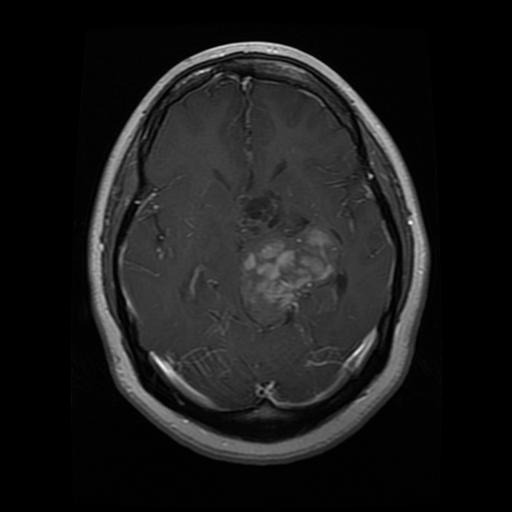

In [2]:
file_1 = "./Train/glioma_tumor/gg (1).jpg"
Image.open(file_1)

In [14]:
data = []
result = []

classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']  
base_path = r'./Train'

encoder = OneHotEncoder()
encoder.fit(np.array(range(len(classes))).reshape(-1, 1))

for idx, class_name in enumerate(classes):
    class_path = os.path.join(base_path, class_name)
    for r, d, f in os.walk(class_path):
        for file in f:
            if '.jpg' in file:
                img = Image.open(os.path.join(r, file))
                img = img.resize((512, 512))
                img = np.array(img)
                
                if img.shape == (512, 512, 3):
                    data.append(img)
                    result.append(encoder.transform([[idx]]).toarray())

data = np.array(data)
result = np.array(result).squeeze() 

In [15]:
data.shape, result.shape

((2870, 512, 512, 3), (2870, 4))

In [16]:
result

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

c:\Users\anway\anaconda3\envs\anway\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,568,708 (5.98 MB)

 Trainable params: 1,568,708 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.3723 - loss: 239.7168 - val_accuracy: 0.5383 - val_loss: 1.3286 - learning_rate: 0.0010
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.5520 - loss: 1.1053 - val_accuracy: 0.6655 - val_loss: 1.0482 - learning_rate: 0.0010
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.6578 - loss: 0.8619 - val_accuracy: 0.7108 - val_loss: 0.8734 - learning_rate: 0.0010
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.7055 - loss: 0.7317 - val_accuracy: 0.7352 - val_loss: 0.8233 - learning_rate: 0.0010
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.7188 - loss: 0.6944 - val_accuracy: 0.7683 - val_loss: 0.7679 - learning_rate: 0.0010
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.7651 - loss: 0.6090 - val_accuracy: 0.6725 - val_loss: 0.8872 - learning_rate: 0.0010
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.7650 - loss: 0.5725 - val_a

In [19]:
model.save('Trained_Model.keras')

In [20]:
history.history

{'accuracy': [0.4102787375450134,
  0.5374564528465271,
  0.5905923247337341,
  0.6302264928817749,
  0.6842334270477295,
  0.7238675951957703,
  0.7565330862998962,
  0.7713414430618286,
  0.7935540080070496,
  0.8061846494674683,
  0.8231707215309143,
  0.8140243887901306,
  0.8305749297142029,
  0.8562718033790588,
  0.8601916432380676,
  0.8858885169029236,
  0.9011324048042297,
  0.9102787375450134,
  0.9046167135238647,
  0.9359756112098694,
  0.9416376352310181,
  0.9303135871887207,
  0.9429442286491394,
  0.9381533265113831,
  0.9385888576507568,
  0.9486062526702881,
  0.9429442286491394,
  0.9416376352310181,
  0.943379819393158,
  0.9464285969734192],
 'loss': [3.8498194217681885,
  1.0519925355911255,
  0.9116196036338806,
  0.7942551374435425,
  0.7058664560317993,
  0.6376798152923584,
  0.5742128491401672,
  0.537481427192688,
  0.4814664125442505,
  0.45523715019226074,
  0.43295857310295105,
  0.4163340628147125,
  0.38703423738479614,
  0.343332976102829,
  0.3320065

In [21]:
import json
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

In [22]:
with open('training_history.json', 'r') as json_file:
    training_history_data = json.load(json_file)

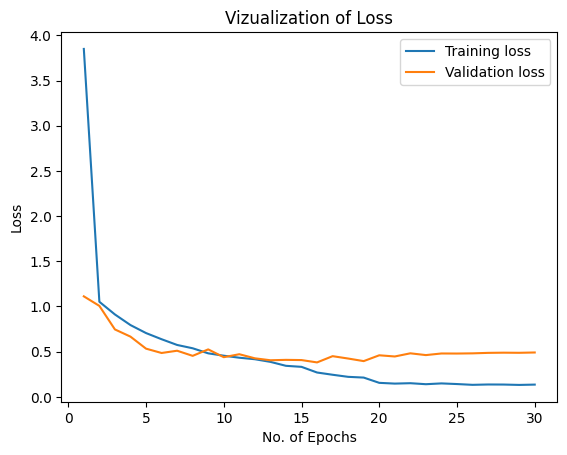

In [23]:
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history_data['loss'], label='Training loss')
plt.plot(epochs, training_history_data['val_loss'], label='Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Vizualization of Loss')
plt.legend()

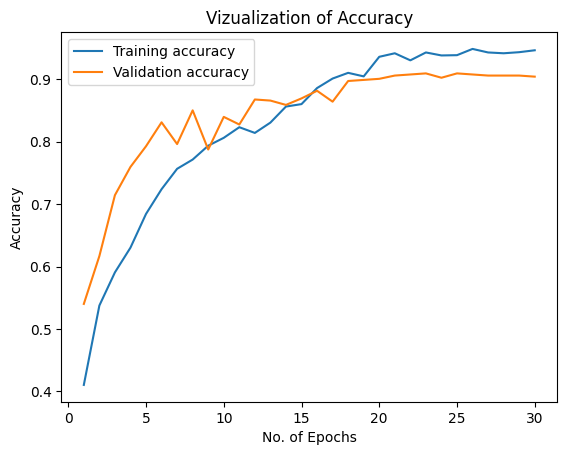

In [24]:
epochs = [i for i in range(1, 31)]
plt.plot(epochs, training_history_data['accuracy'], label='Training accuracy')
plt.plot(epochs, training_history_data['val_accuracy'], label='Validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Vizualization of Accuracy')
plt.legend()

In [25]:
y_pred = model.predict(X_test)
y_pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


array([[1.0000000e+00, 2.6264210e-11, 2.8887794e-13, 9.8005941e-17],
       [1.7551682e-09, 1.4627087e-05, 9.9422275e-09, 9.9998534e-01],
       [1.0000000e+00, 5.4916844e-09, 5.1528248e-12, 7.0176991e-14],
       ...,
       [1.0000000e+00, 6.5567041e-10, 7.7513090e-10, 5.9424465e-13],
       [1.3561352e-16, 2.3509569e-06, 9.9999762e-01, 1.9798518e-17],
       [3.7013725e-03, 9.9628651e-01, 1.0284391e-05, 1.7575430e-06]],
      dtype=float32)

In [26]:
y_pred.shape

(574, 4)

In [27]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([0, 3, 0, 0, 3, 1, 3, 2, 0, 3, 1, 1, 0, 0, 3, 1, 2, 0, 2, 1, 1, 3,
       1, 3, 1, 0, 3, 1, 3, 0, 1, 2, 2, 3, 3, 1, 1, 2, 3, 0, 1, 3, 3, 3,
       2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 3, 0, 3, 2, 1, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 0, 2, 0, 0, 2, 0, 1, 1, 3,
       2, 3, 1, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 2, 1, 1, 3, 0, 3, 1,
       0, 3, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 1, 1, 1, 1, 0, 0, 0,
       2, 1, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 3, 3, 3, 2, 0,
       0, 0, 3, 1, 1, 1, 2, 1, 0, 0, 3, 1, 3, 3, 2, 2, 1, 2, 0, 1, 0, 2,
       0, 0, 3, 3, 3, 2, 1, 0, 0, 1, 0, 3, 1, 0, 3, 2, 1, 2, 0, 1, 3, 0,
       3, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 0, 1, 1, 3, 3,
       0, 1, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1, 1, 0, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 2, 1, 0, 3, 3, 0, 2, 3,
       2, 1, 0, 2, 1, 0, 3, 0, 1, 0, 2, 1, 3, 3, 3,

In [28]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([0, 3, 0, 0, 3, 1, 3, 2, 0, 3, 1, 1, 1, 0, 3, 0, 1, 0, 2, 1, 0, 3,
       1, 3, 1, 0, 3, 1, 3, 0, 1, 2, 2, 0, 3, 1, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 0, 2, 0, 1, 2, 0, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 2, 1, 1, 3, 0, 3, 1,
       0, 3, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 3, 3, 3, 2, 0,
       0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 3, 1, 3, 3, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 3, 3, 3, 2, 1, 1, 0, 1, 0, 3, 1, 0, 3, 2, 3, 2, 0, 2, 3, 0,
       3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 1, 1, 1, 3, 3,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 1, 1, 0, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3,
       2, 1, 0, 2, 1, 1, 3, 0, 1, 0, 2, 1, 3, 3, 3,

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.93      0.92       179
meningioma_tumor       0.87      0.82      0.84       169
        no_tumor       0.86      0.90      0.88        70
 pituitary_tumor       0.95      0.96      0.96       156

        accuracy                           0.90       574
       macro avg       0.90      0.90      0.90       574
    weighted avg       0.90      0.90      0.90       574



In [30]:
cm

array([[167,  11,   0,   1],
       [ 13, 139,  10,   7],
       [  2,   5,  63,   0],
       [  1,   5,   0, 150]], dtype=int64)

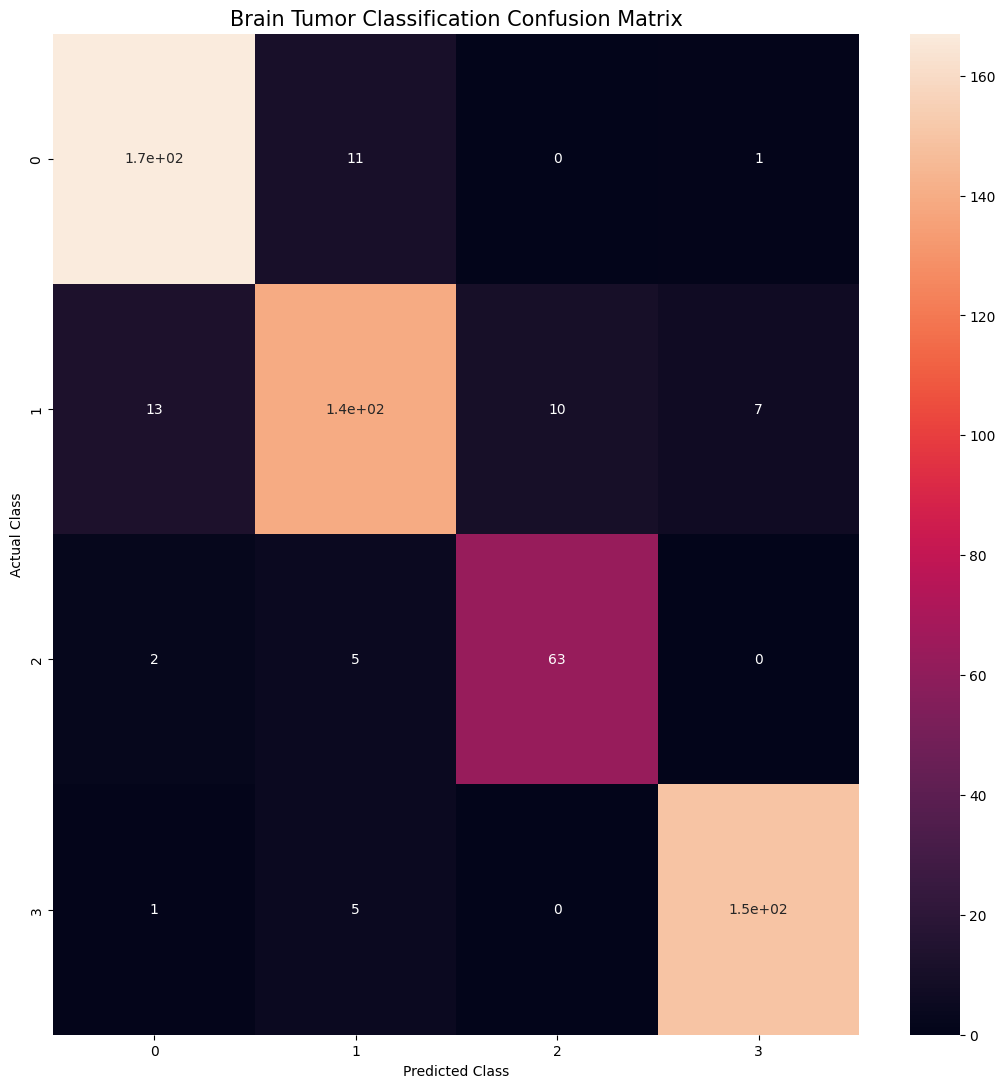

In [40]:
plt.figure(figsize=(13, 13))
sns.heatmap(cm,annot=True)

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Brain Tumor Classification Confusion Matrix',fontsize = 15)
plt.show()